In [2]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from q_channel_approx.physics_defns import *
from q_channel_approx import solve_lindblad_rho0, create_observables_comp_basis, measure_rhos
from q_channel_approx.plotting import plot_ref, legend_comp

system = DecaySystem(1, (0.4,), m=1)
Ak = default_jump_operators(1, (0.15,))
Al = no_decay_jump_operators()
Os_comp = [O.full() for O in create_observables_comp_basis(m=1)]

In [4]:
N = 200
delta_t = 0.1

In [5]:
rho0 = rho_rand_haar(m=1, seed=10944)

In [6]:
rhos_open, ts = solve_lindblad_rho0(
    rho0,
    delta_t=delta_t,
    N=N,
    s=system,
    jump_opers=Ak,
)
rhos_closed, ts = solve_lindblad_rho0(
    rho0,
    delta_t=delta_t,
    N=N,
    s=system,
    jump_opers=Al,
)
Ess_open = measure_rhos([r.full() for r in rhos_open], Os_comp)
Ess_closed = measure_rhos([r.full() for r in rhos_closed], Os_comp)

c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


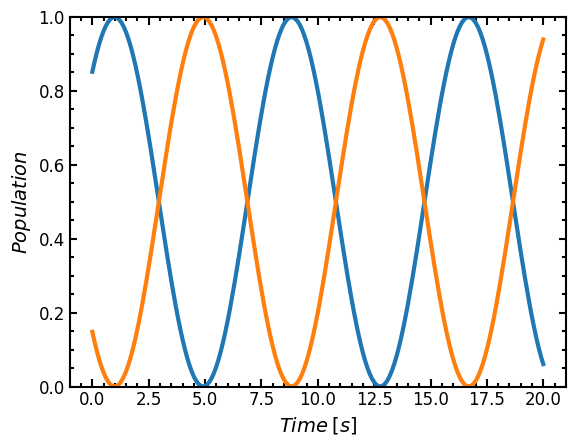

In [7]:
plot_ref(ts, Ess_closed, linestyle="-")

plt.ylabel("$Population$")
plt.xlabel("$Time \:[s]$")
plt.ylim(0, 1)
plt.savefig("example-closed.pdf", bbox_inches="tight")

In [8]:
# from qutip import MESolver
# help(MESolver.options)

c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


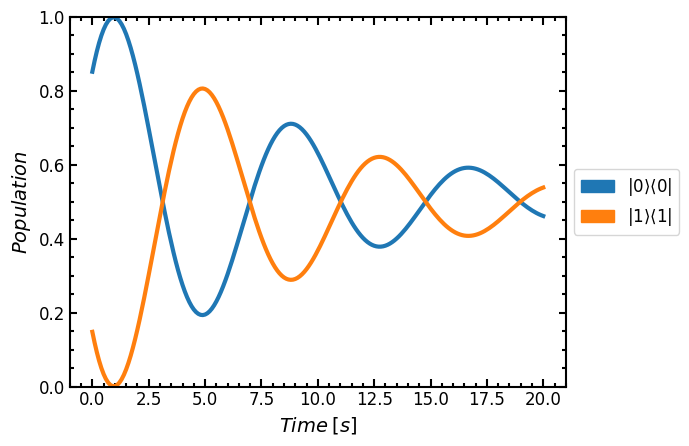

In [9]:
plot_ref(ts, Ess_open, linestyle="-")

plt.ylabel("$Population$")
plt.xlabel("$Time \: [s]$")
plt.ylim(0, 1)
lgd = plt.gca().legend(handles=legend_comp(1), loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("example-open.pdf", bbox_extra_artists=(lgd,), bbox_inches="tight")

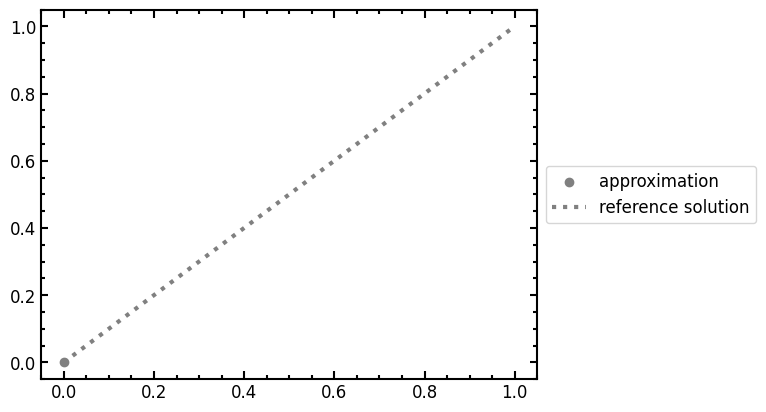

In [19]:
plt.scatter(0, 0 , c="gray", label="approximation")
plt.plot((0, 1), (0, 1), ":", c="gray", label="reference solution")
lgd = plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("legend.pdf", bbox_extra_artists=(lgd,), bbox_inches="tight")